In [16]:
pip install tigramite

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install dcor

Note: you may need to restart the kernel to use updated packages.


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import parcorr, gpdc, cmiknn

def dyn(x1,x2,x3,x4):
    x1 = -0.287*x2 + np.random.normal()
    x2 = 0.4*x2 + 0.287*x1+ np.random.normal()
    x3 = 0.9*x3 + np.random.normal()
    x4 = 0.9 * x2 + np.random.normal()
    return x1,x2,x3,x4


x1_ini,x2_ini,x3_ini,x4_ini = np.random.rand(4,1) #initial state
timestep = 200
data = np.expand_dims(np.concatenate((x1_ini,x2_ini,x3_ini,x4_ini ), axis=0),axis=0) #shape = [1,4]
for step in range(timestep): # run dynamics
    x1_ini,x2_ini,x3_ini,x4_ini = dyn(x1_ini,x2_ini,x3_ini,x4_ini)
    temp = np.expand_dims(np.concatenate((x1_ini,x2_ini,x3_ini,x4_ini), axis=0),axis=0)
    data = np.concatenate((data, temp), axis=0) 
print(data.shape) #shape = [timestep+1,4]
var_names = ['x1', 'x2', 'x3', 'x4']
dataframe = pp.DataFrame(data,
                         datatime=np.arange(len(data)),
                         var_names=var_names)

(201, 4)


(<Figure size 640x480 with 4 Axes>,
 array([<Axes: ylabel='x1'>, <Axes: ylabel='x2'>, <Axes: ylabel='x3'>,
        <Axes: ylabel='x4'>], dtype=object))

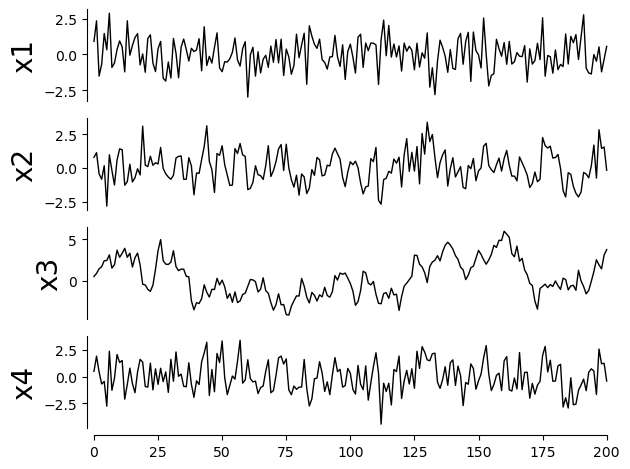

In [19]:
tp.plot_timeseries(dataframe,label_fontsize=20,tick_label_size=10)



##
## Estimating lagged dependencies 
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 20


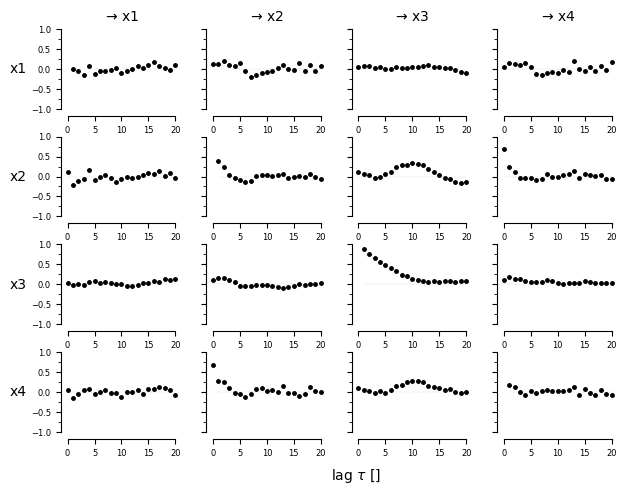

In [20]:
correlations = pcmci.get_lagged_dependencies(tau_max=20, val_only=True)['val_matrix']
lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, setup_args={'var_names':var_names,
                                  'x_base':5, 'y_base':.5})


##
## Step 1: PC1 algorithm with lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 2
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable x1 has 2 link(s):
    [pc_alpha = 0.2]
        (x2 -1): max_pval = 0.00012, min_val = -0.271
        (x1 -1): max_pval = 0.13608, min_val = -0.107

    Variable x2 has 1 link(s):
    [pc_alpha = 0.05]
        (x2 -1): max_pval = 0.00091, min_val =  0.235

    Variable x3 has 4 link(s):
    [pc_alpha = 0.3]
        (x3 -1): max_pval = 0.00000, min_val =  0.691
        (x2 -2): max_pval = 0.14708, min_val =  0.104
        (x1 -2): max_pval = 0.20223, min_val = -0.091
        (x4 -1): max_pval = 0.21007, min_val = -0.090

    Variable x4 has 3 link(s):
    [pc_alpha = 0.5]
        (x2 -1): max_pval = 0.01913, min_val =  0.167
        (x3 -1): max_pval = 0.04234, min_val =  0.145
        (x3 -2): max_pval = 0.48535, min_val =  0.05

(<Figure size 640x480 with 1 Axes>, <Axes: >)

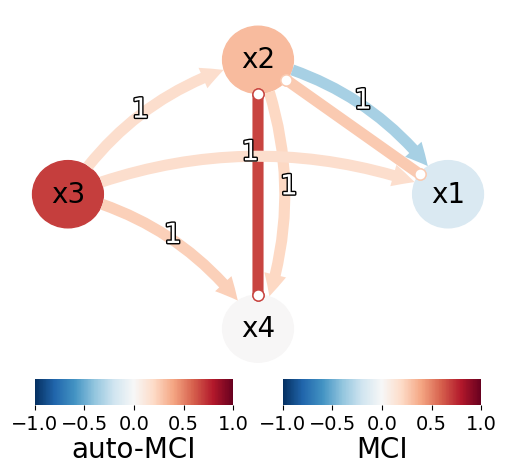

In [21]:
ParCorr = parcorr.ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe,
    cond_ind_test=ParCorr,
    verbosity=1)

pcmci.verbosity = 1
tau_max=2
results = pcmci.run_pcmci(tau_max=tau_max, pc_alpha=None)
q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], tau_max=tau_max, fdr_method='fdr_bh')

tp.plot_graph(graph = results['graph'],
    val_matrix=results['val_matrix'],
    var_names=var_names,
    link_colorbar_label='MCI',
    node_colorbar_label='auto-MCI',
    link_label_fontsize=20,
    label_fontsize=20,
    tick_label_size=14,
    node_label_size=20,
    edge_ticks=0.5,
    node_ticks=0.5,
    node_size=0.5
    )

(<Figure size 400x400 with 1 Axes>, <Axes: >)

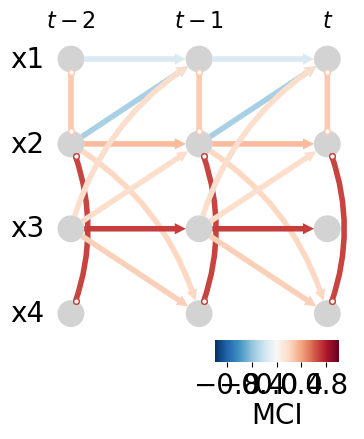

In [22]:
tp.plot_time_series_graph(
    figsize=(4, 4),
    val_matrix=results['val_matrix'],
    graph = results['graph'],
    var_names=var_names,
    link_colorbar_label='MCI',
    label_fontsize=20,
    tick_label_size=20
)